In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

### Extraction Features

In [13]:
df_train = pd.read_csv('processed_data/Resume_removeStopword_useLemm/train.csv')
df_test = pd.read_csv('processed_data/Resume_removeStopword_useLemm/test.csv')
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

ID                                         Resume_str  \
0  28111403  president chief executive officer executive pr...   
1  29908929  business development marketing summary busines...   
2  15261348  chef restaurant manager summary chef year high...   
3  75435017  charge nurse professional summary objective ob...   
4  41152404  test analyst intern contractor profile year pr...   

                 Category  
0  INFORMATION-TECHNOLOGY  
1    BUSINESS-DEVELOPMENT  
2                    CHEF  
3              HEALTHCARE  
4  INFORMATION-TECHNOLOGY

In [14]:
count_vect = CountVectorizer(
    lowercase=True,         # Convert all text to lowercase
    binary=False,           # Use term frequency, not just presence/absence
    max_features=10000,     # Keep only the top 10,000 most frequent terms
    ngram_range=(1, 3),     # Extract n-grams
    max_df=0.8,             # Ignore terms that appear in more than 80% of documents
    min_df=2                # Ignore terms that appear in fewer than 2 documents
)

In [15]:
# Convert resumes to document-term matrix
resume_countvectorizer = count_vect.fit_transform(df['Resume_str'])

In [16]:
print(f"Number of unique terms in the vocabulary: {len(count_vect.vocabulary_)}")

Number of unique terms in the vocabulary: 10000


In [17]:
# Get feature names (n-grams)
feature_names = count_vect.get_feature_names_out()

categories = df['Category'].unique()
n = len(categories)

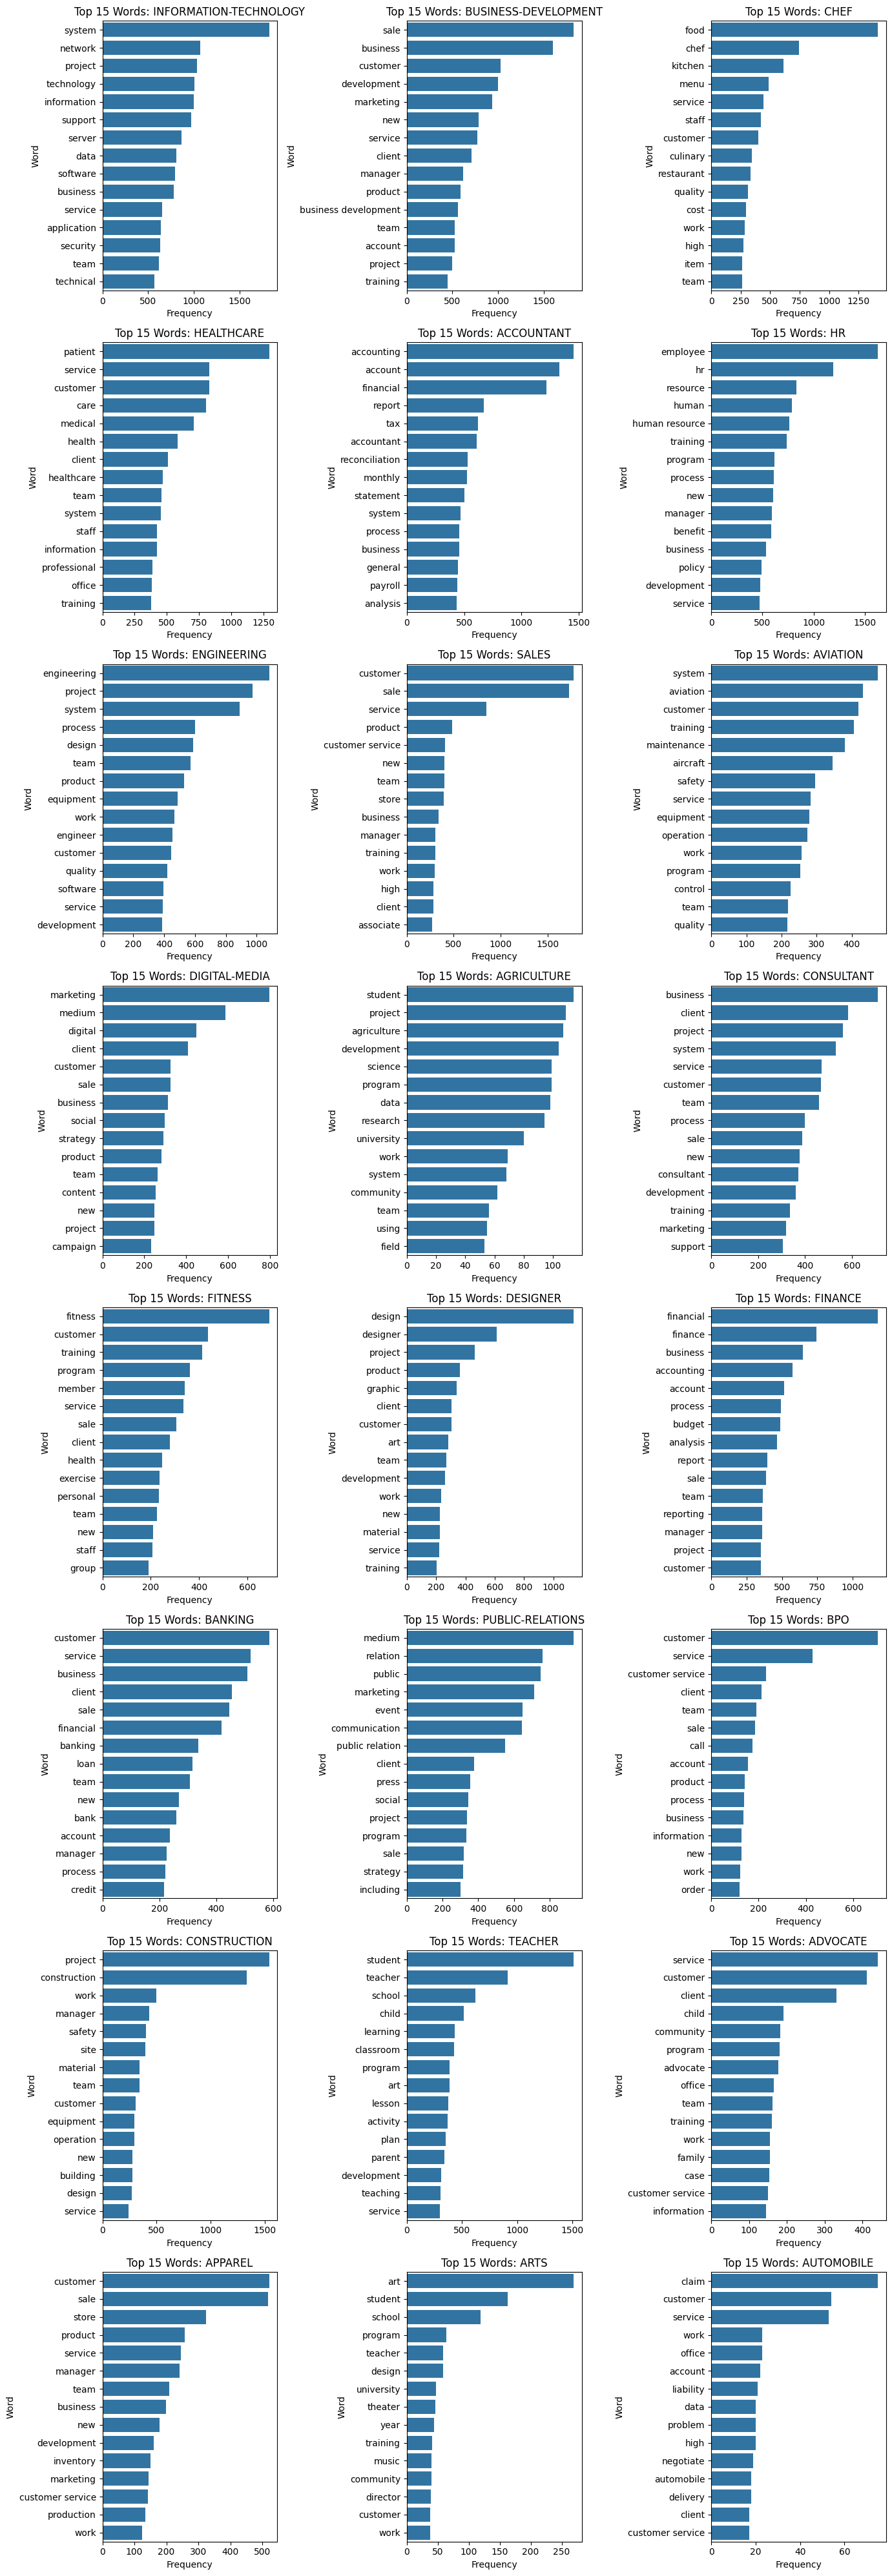

In [18]:
# Convert the document-term matrix to a DataFrame
resume_df = pd.DataFrame(resume_countvectorizer.toarray(), columns=feature_names)

# Parameters for visualization
top_n_words = 15

# Define subplot layout
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()       # Flatten in case of 1D array of axes

# Plot bar chart of top words for each category
for idx, category in enumerate(categories):
    cat_df = resume_df[df['Category'] == category]
    word_freq = cat_df.sum().sort_values(ascending=False).head(top_n_words)     # Get top words

    sns.barplot(x=word_freq.values, y=word_freq.index, ax=axes[idx])
    axes[idx].set_title(f"Top {top_n_words} Words: {category}")
    axes[idx].set_xlabel("Frequency")
    axes[idx].set_ylabel("Word")

plt.subplots_adjust(hspace=0.7)
plt.tight_layout()
plt.show()

In [ ]:
def make_wordcloud(ax, freq_dict, title=None):
    wc = WordCloud(width=800, height=400, background_color='black')
    wc.generate_from_frequencies(freq_dict)         # Generate word cloud from frequency dictionary
    ax.imshow(wc, interpolation='bilinear')
    if title:
        ax.set_title(title, fontsize=14)
    ax.axis('off')

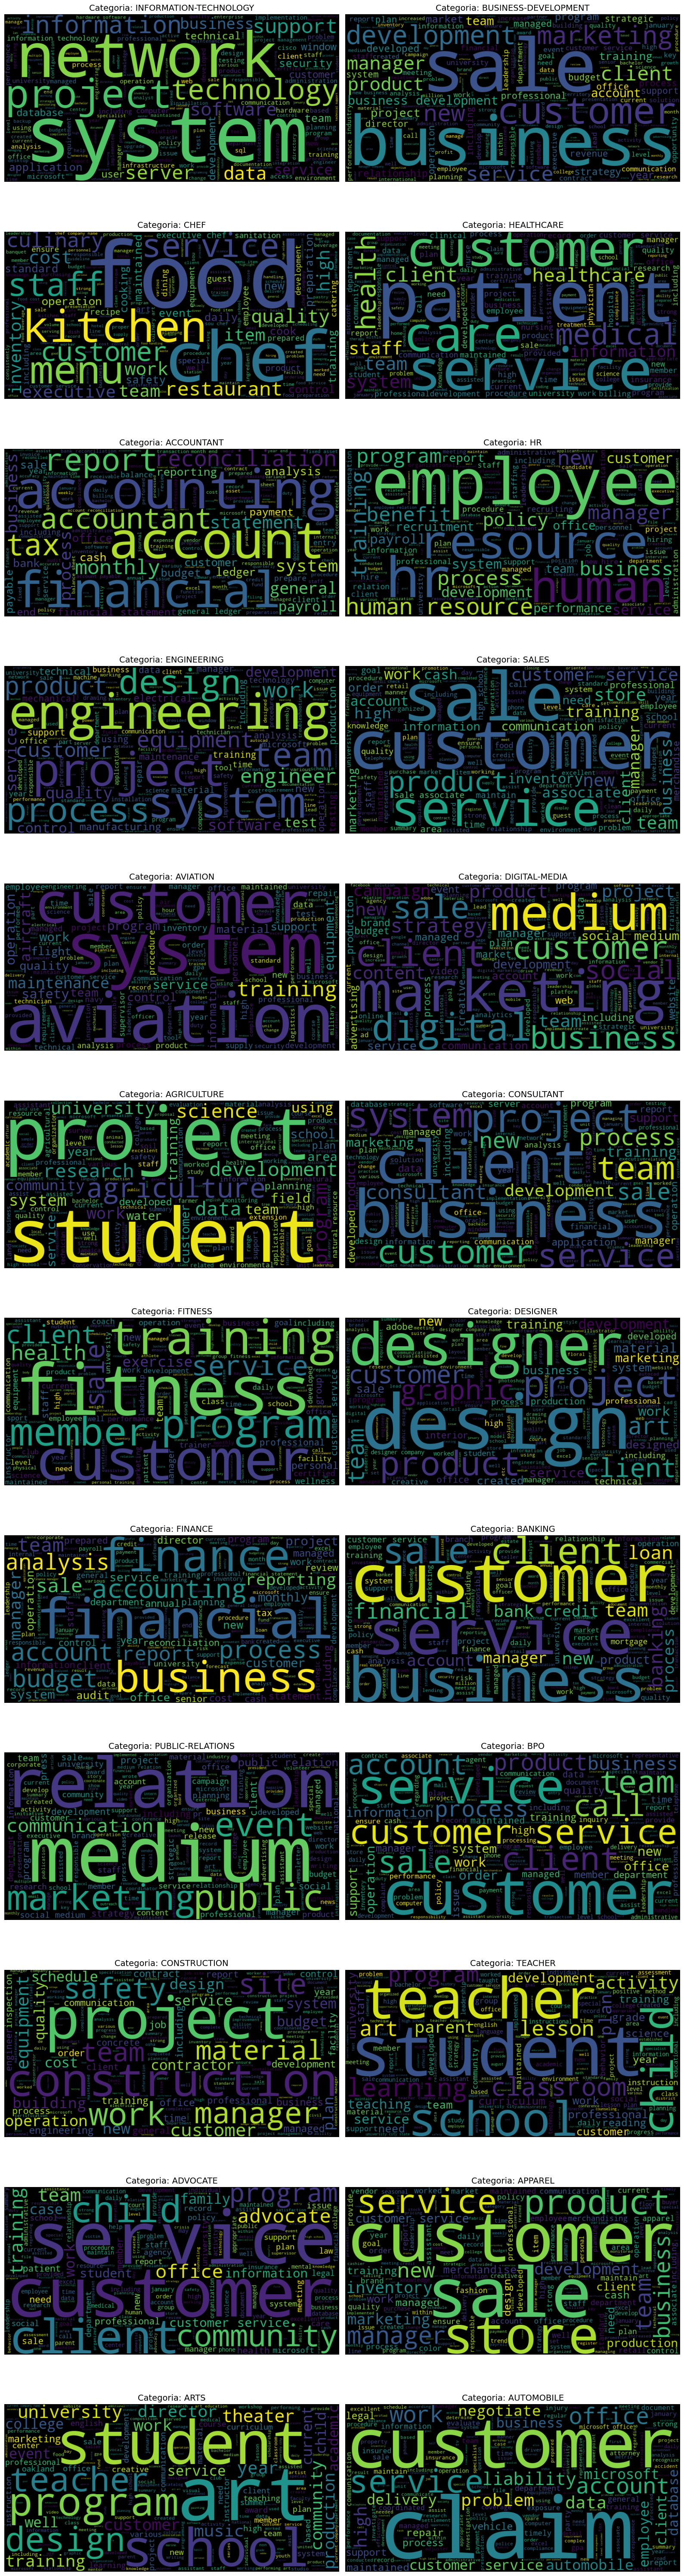

In [20]:
# Define subplot layout
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

# Generate a WordCloud for each category
for i, cat in enumerate(categories):
    idx = np.where(df['Category'] == cat)[0]    # Get indices of documents in this category

    freq_vec = resume_countvectorizer[idx].sum(axis=0).A1   # Sum the count vectors of those documents

    # Build dictionary: word -> frequency
    freq_dict = {
        word: freq 
        for word, freq in zip(feature_names, freq_vec) 
        if freq > 0
    }

    make_wordcloud(ax=axes[i], freq_dict=freq_dict, title=f"Categoria: {cat}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()